In [1]:
import tifffile as tiff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from skimage.filters import threshold_otsu
from skimage.morphology import convex_hull_image
from skimage import measure

In [3]:
testimg1 = "test_img/MGAT2_test1.tif"
testimg2 = "test_img/MGAT2_test2.tif"

In [4]:
def loadImage(img_file):
    """Loads open tiff connection to n-dimensional numpy arrays
    """
    with tiff.TiffFile(img_file) as tif:
        images = tif.asarray().astype(float)
    return(images)

In [5]:
df1 = loadImage(testimg1)
df2 = loadImage(testimg2)

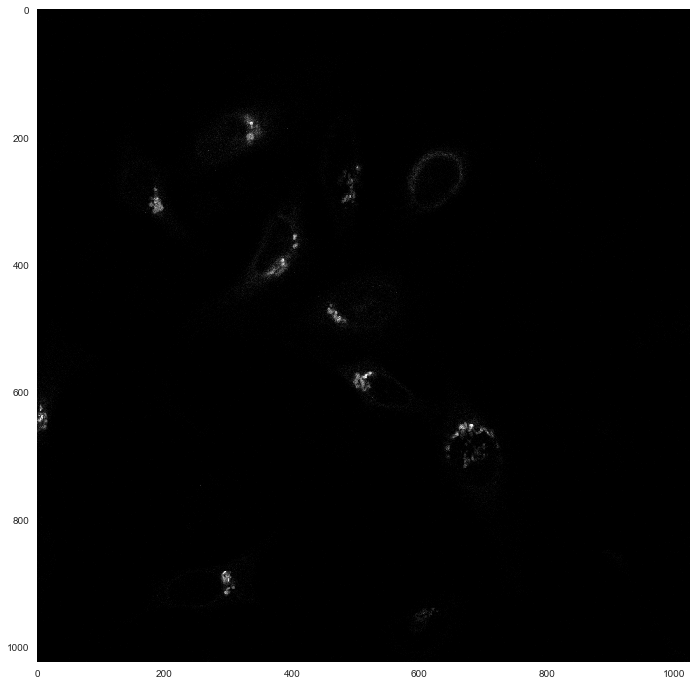

In [7]:
fig = plt.figure(figsize=(12, 12))
plt.imshow(df1[0], cmap="Greys_r")
plt.grid(None)

In [52]:
img = df1[0]

In [53]:
from skimage.filters import gaussian

In [89]:
img_gauss = gaussian(img, sigma=15)

In [90]:
thresh = threshold_otsu(img_gauss)
binary = img_gauss > thresh
contours = measure.find_contours(binary, 0.3)

(-0.5, 1023.5, 1023.5, -0.5)

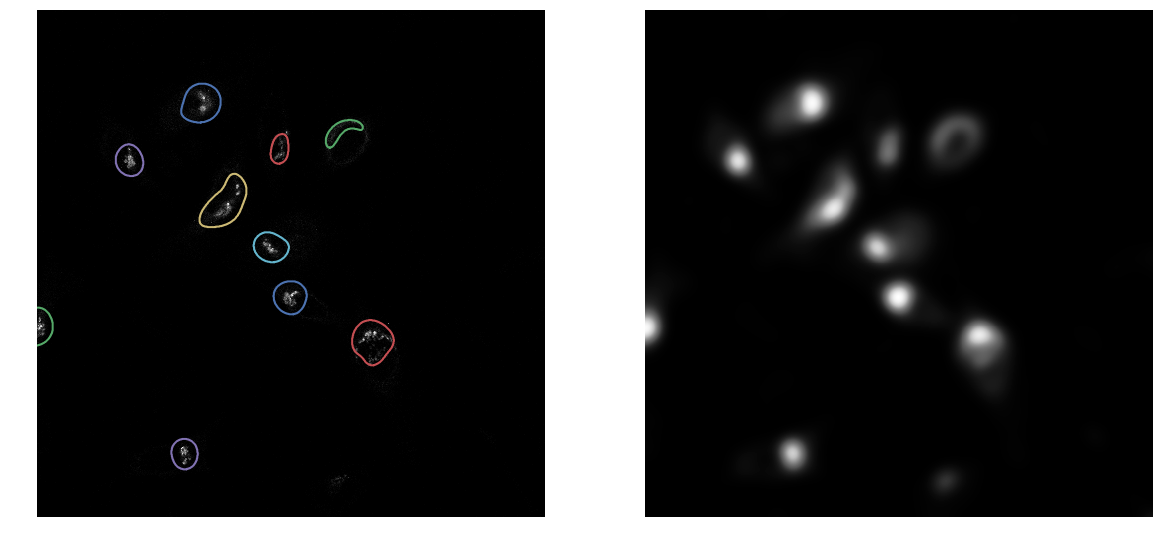

In [91]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20,10))
ax1.imshow(img, cmap="Greys_r")
for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax1.axis('off')

ax2.imshow(img_gauss, cmap="Greys_r")
ax2.axis('off')

In [92]:
test_contour = contours[0]

(-0.5, 1023.5, 1023.5, -0.5)

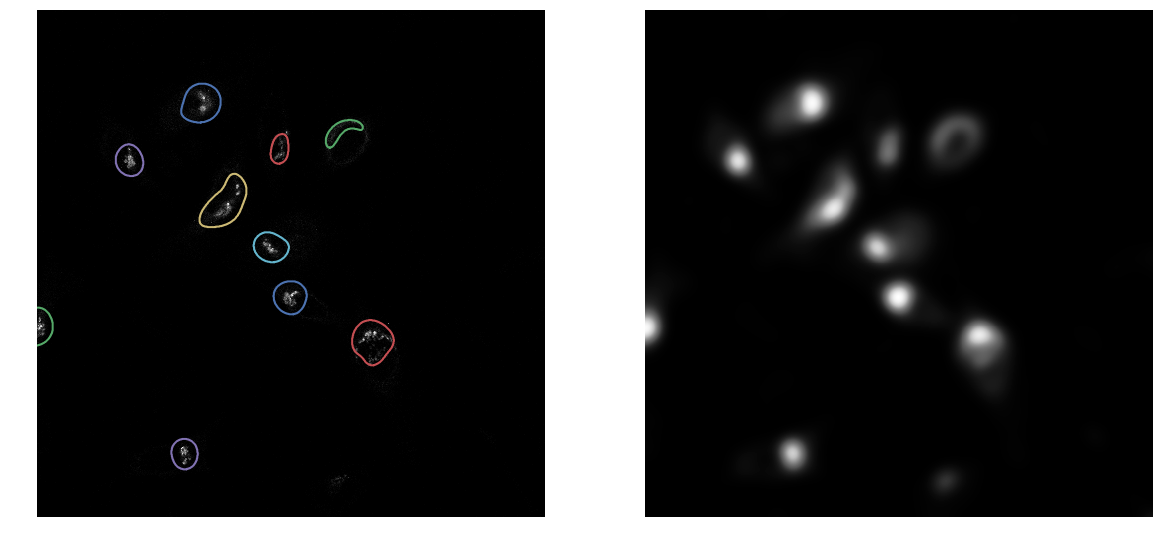

In [100]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20,10))
ax1.imshow(img, cmap="Greys_r")

for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax1.axis('off')

ax2.imshow(img_gauss, cmap="Greys_r")
ax2.axis('off')

In [104]:
#from matplotlib import path
from skimage.morphology import convex_hull_image
import math

In [95]:
chull = convex_hull_image(test_contour)

In [109]:
resized = img[int(test_contour)]

TypeError: only length-1 arrays can be converted to Python scalars

In [103]:
floor

NameError: name 'floor' is not defined

In [111]:
test_contour[:, 0].min()

149.30000000000001

In [112]:
def get_min_max(contour):
    ymin = contour[:, 0].min()
    ymax = contour[:, 0].max()
    xmin = contour[:, 0].min()
    xmax = contour[:, 0].max()
    return(ymin, ymax, xmin, xmax)

In [113]:
get_min_max(test_contour)

(149.30000000000001,
 227.69999999999999,
 149.30000000000001,
 227.69999999999999)